In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [27]:
df_ads = pd.read_excel(r'C:\Users\krish\Desktop\Subjects\AppliedML\Lec-4\ADS_Index.xlsx')

In [28]:
df_ads.head()

,Date,ADS_Index
0,1960-03-01,-2.395069
1,1960-03-02,-2.369012
2,1960-03-03,-2.341905
3,1960-03-04,-2.313746
4,1960-03-05,-2.284532


In [29]:
df_ads.dtypes

Date         datetime64[ns]
ADS_Index           float64
dtype: object

In [40]:
df_ads= df_ads[df_ads.Date > '20160515']

In [41]:
df_ads.head()

,Date,ADS_Index
20530,2016-05-16,-0.446725
20531,2016-05-17,-0.435530
20532,2016-05-18,-0.423904
20533,2016-05-19,-0.411847
20534,2016-05-20,-0.399357


In [43]:
df_ads.shape

(1691, 2)

In [44]:
df_ads.index = range(0, 1691, 1)

In [45]:
df_jpm = pd.read_csv(r'C:\Users\krish\Desktop\Subjects\AppliedML\Lec-4\JPM.csv')
df_jpm = df_jpm[df_jpm.Date <= '2020-04-30']

In [46]:
df_jpm.shape

(997, 7)

In [47]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000


In [48]:
df_jpm['ADS_Index'] = df_ads['ADS_Index']

In [49]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADS_Index
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,-0.446725
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.435530
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,-0.423904
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.411847
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,-0.399357


In [50]:
df_jpm['stock_return'] = df_jpm['Adj Close'].pct_change()

In [51]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADS_Index,stock_return
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,-0.446725,NaN
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.435530,0.000000
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,-0.423904,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.411847,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,-0.399357,0.001893


In [52]:
df_jpm = df_jpm[df_jpm['stock_return'].notna()]

In [53]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADS_Index,stock_return
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.435530,0.000000
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,-0.423904,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.411847,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,-0.399357,0.001893
5,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.386431,-0.000787


In [54]:
df_jpm = df_jpm[df_jpm.stock_return != 0]

In [55]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADS_Index,stock_return
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,-0.423904,0.038599
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.411847,-0.010150
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,-0.399357,0.001893
5,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.386431,-0.000787
6,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,-0.373070,0.017019


In [56]:
T = df_jpm.shape[0]
T

988

In [57]:
columns = ['ADS_Index']
X=df_jpm[columns]

In [58]:
X.head()

,ADS_Index
2,-0.423904
3,-0.411847
4,-0.399357
5,-0.386431
6,-0.373070


In [59]:
X = np.column_stack([np.ones((len(X),1)),X])
X.shape

(988, 2)

In [60]:
X

array([[ 1.        , -0.42390439],
       [ 1.        , -0.41184713],
       [ 1.        , -0.39935662],
       ...,
       [ 1.        , -0.49089783],
       [ 1.        , -0.50232005],
       [ 1.        , -0.51270743]])

In [61]:
Y = df_jpm['stock_return'].values
Y.shape

(988,)

In [62]:
Y

array([ 3.85988034e-02, -1.01498333e-02,  1.89298255e-03, -7.87240718e-04,
        1.70186862e-02,  1.51844739e-02, -7.47884813e-03,  6.15121862e-03,
       -2.44561960e-03,  6.43484452e-03,  1.82670380e-03, -1.77784148e-02,
        9.90101532e-03, -3.37008777e-03,  2.92031670e-03, -7.66269996e-03,
       -1.40539794e-02, -8.92861858e-03, -1.88081815e-02, -1.77209089e-03,
        4.03429218e-03,  9.64325293e-04,  1.44502246e-03,  9.29943464e-03,
       -3.81256984e-03,  2.13681140e-02, -6.94769502e-02, -3.33892597e-02,
        3.31539243e-02,  2.82258842e-02,  1.53593091e-02, -6.48721258e-03,
       -2.79136515e-02,  1.07473742e-02,  6.47934141e-03,  2.06338255e-02,
        7.11637450e-03,  1.49349451e-02, -6.32832832e-04,  1.51994357e-02,
        9.35802649e-04, -3.42800488e-03, -1.56338748e-03,  1.09602914e-03,
       -3.75416200e-03,  5.49555947e-03, -2.65450426e-03,  4.07043697e-03,
        3.11879869e-03, -3.57521681e-03, -2.02814145e-03, -2.65747868e-03,
       -2.35110155e-03,  

In [64]:
Y=np.asarray(Y)
Y = Y.reshape(988,1)

In [65]:
'OLS REGRESSION STARTS'
'Linear Regression of Y: T x 1 on'
'Regressors X: T x N'
invXX = np.linalg.inv(X.transpose()@X)
invXX

array([[ 1.01247173e-03, -7.98657360e-05],
       [-7.98657360e-05,  1.95669572e-02]])

In [66]:
invXX.shape

(2, 2)

In [67]:
'OLS estimates for coefficients: X x 1'
beta_hat = invXX@X.transpose()@Y
beta_hat

array([[ 0.00073578],
       [-0.00171481]])

In [68]:
'Predictive value of Y using OLS'
y_hat = X@beta_hat
y_hat.shape

(988, 1)

In [69]:
'Residuals from OLS'
residuals = Y - y_hat
residuals.shape

(988, 1)

In [70]:
'Variance of residuals'
variance = (1/T)*residuals.transpose()@residuals
variance

array([[0.00033573]])

In [71]:
'standard deviation of Y or residuals'
standard_deviation = np.sqrt(variance)

In [72]:
'variance-covariance matrix of beta_hat'
varcov_beta_hat = (variance)*invXX
std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))


In [73]:
N = X.shape

In [74]:

'Calculate R-square'
R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
print(R_square)
print(adj_R_square)


[[0.00045286]]
[[-0.00056088]]


In [75]:
'Test Each Coefficient: beta_i'
'Null Hypothesis: beta_i = 0'
t_stat = (beta_hat.transpose()-0)/std_beta_hat
p_val_t = 1-ss.norm.cdf(t_stat)


In [76]:
'Test of Joint Significance of Model'
F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
         (residuals.transpose()@residuals/(T-N[1]))

p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])

p_val_F

array([[1.11022302e-16]])

In [77]:
def print_all_values():
    print('Variance-------------',variance)
    print('Standard Deviation---',standard_deviation)
    print('R Square-------------',R_square)
    print('Adjusted R Square----',adj_R_square)
    print('P values-------------',p_val_t,p_val_F)
    plt.plot(y_hat, color='green')
    plt.plot(Y, color = 'red')
    plt.show()


Variance------------- [[0.00033573]]
Standard Deviation--- [[0.01832296]]
R Square------------- [[0.00045286]]
Adjusted R Square---- [[-0.00056088]]
P values------------- [[0.48398685 0.50849099]] [[1.11022302e-16]]


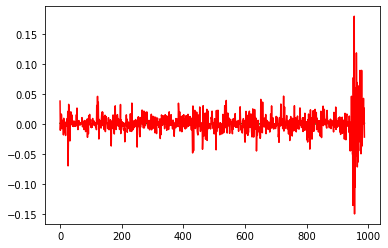

In [78]:
print_all_values()

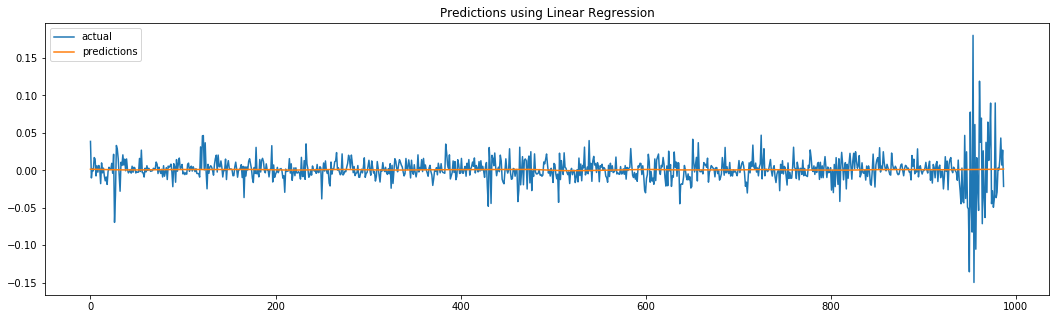

In [79]:
pred = pd.DataFrame(y_hat)
act = pd.DataFrame(Y)

plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})
plot_df.plot(figsize=(18, 5), title='Predictions using Linear Regression')